# SY25 — SensorLLM: State of the Art (Literature Review)

## 1. Introduction and Motivation
Wearable and embedded sensors (e.g., smartwatches, fitness trackers, medical devices) continuously generate large-scale **multivariate time-series data**, such as accelerometer, gyroscope, heart rate, electrodermal activity, temperature, or altitude signals. These data are commonly used for **Human Activity Recognition (HAR)** and health-related monitoring tasks.

Traditional deep learning methods can achieve strong classification accuracy but often remain **black-box models**, providing only activity labels without explanations. Recently, research has focused on bridging **time-series data and natural language**, enabling models not only to classify sensor signals but also to **describe**, **interpret**, and **answer questions** about them.

This project focuses on **SensorLLM**, a framework that aligns sensor time-series signals with **Large Language Models (LLMs)** to improve HAR performance and to enable language-based interaction with sensor data (e.g., sensor question answering).


## 2. Classical Approaches for Human Activity Recognition (HAR)

### 2.1 CNN and RNN-based Models
Early deep learning solutions for HAR often combine **Convolutional Neural Networks (CNNs)** and **Recurrent Neural Networks (RNNs)** such as LSTMs or GRUs.  
- **CNNs** learn local temporal patterns (e.g., bursts, peaks, periodicity).
- **RNNs/LSTMs** model sequential dependencies over time.

These models are effective for classification, but they usually lack interpretability and are not designed to generate natural language explanations or interact through text.

### 2.2 Transformer-based Time-Series Models
Transformers have been adapted to time-series modeling to capture longer-range dependencies. Patch-based Transformers (e.g., segmenting signals into patches) can improve performance in forecasting and classification tasks. However, these models remain primarily **numerical**, and they do not naturally connect sensor patterns to **linguistic concepts** or textual reasoning.


## 3. Large Language Models and Multimodal Learning (Time Series ↔ Language)

### 3.1 LLMs for Time-Series Understanding
Large Language Models (LLMs) such as LLaMA have strong reasoning and text generation abilities. Recent multimodal approaches attempt to apply LLMs to time-series by introducing **adapters/projection layers** that map numeric signals into a representation space compatible with text-based models. This can enable:
- textual descriptions of signals,
- explanations of predictions,
- question answering over sensor segments.

### 3.2 Key Challenges
Despite progress, two challenges remain central:
1. **Semantic alignment**: numerical signal patterns must correspond to meaningful language concepts (e.g., “rapid increase”, “stable then decreasing”, “periodic motion”).
2. **Generalization**: models often struggle to transfer across datasets with different sensors, sampling rates, or subject populations.


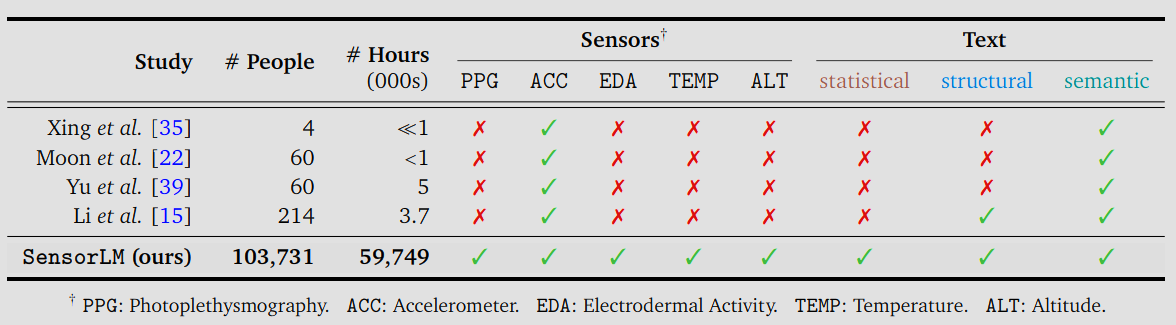

## 4. SensorLLM Contribution
SensorLLM addresses time-series ↔ language alignment by training a model to associate sensor patterns with natural language descriptions. Instead of treating HAR purely as classification, SensorLLM aims to enable **SensorQA** and more interpretable representations of sensor signals.

## 5. SensorLLM Methodology: A Two-Stage Framework

### 5.1 Stage 1 — Sensor–Language Alignment
Stage 1 aligns **short time-series segments** (often single-channel) with **automatically generated textual descriptions** that capture signal trends (e.g., increasing/decreasing/stable patterns).  
A time-series encoder (e.g., Chronos-style encoder) converts numeric sequences into embeddings, which are then aligned with a **Large Language Model** (e.g., LLaMA-family).  
Goal: teach the LLM to associate numeric sensor patterns with linguistic concepts, reducing reliance on costly manual annotation.

### 5.2 Stage 2 — Task-Aware Tuning for HAR
Stage 2 fine-tunes the aligned model for **Human Activity Recognition** using multivariate sensor signals. A **sequence classification** head is trained with supervised labels, and performance is typically evaluated using metrics such as **accuracy** and **macro F1-score**.  
Goal: improve HAR performance while leveraging the semantic alignment learned in Stage 1.


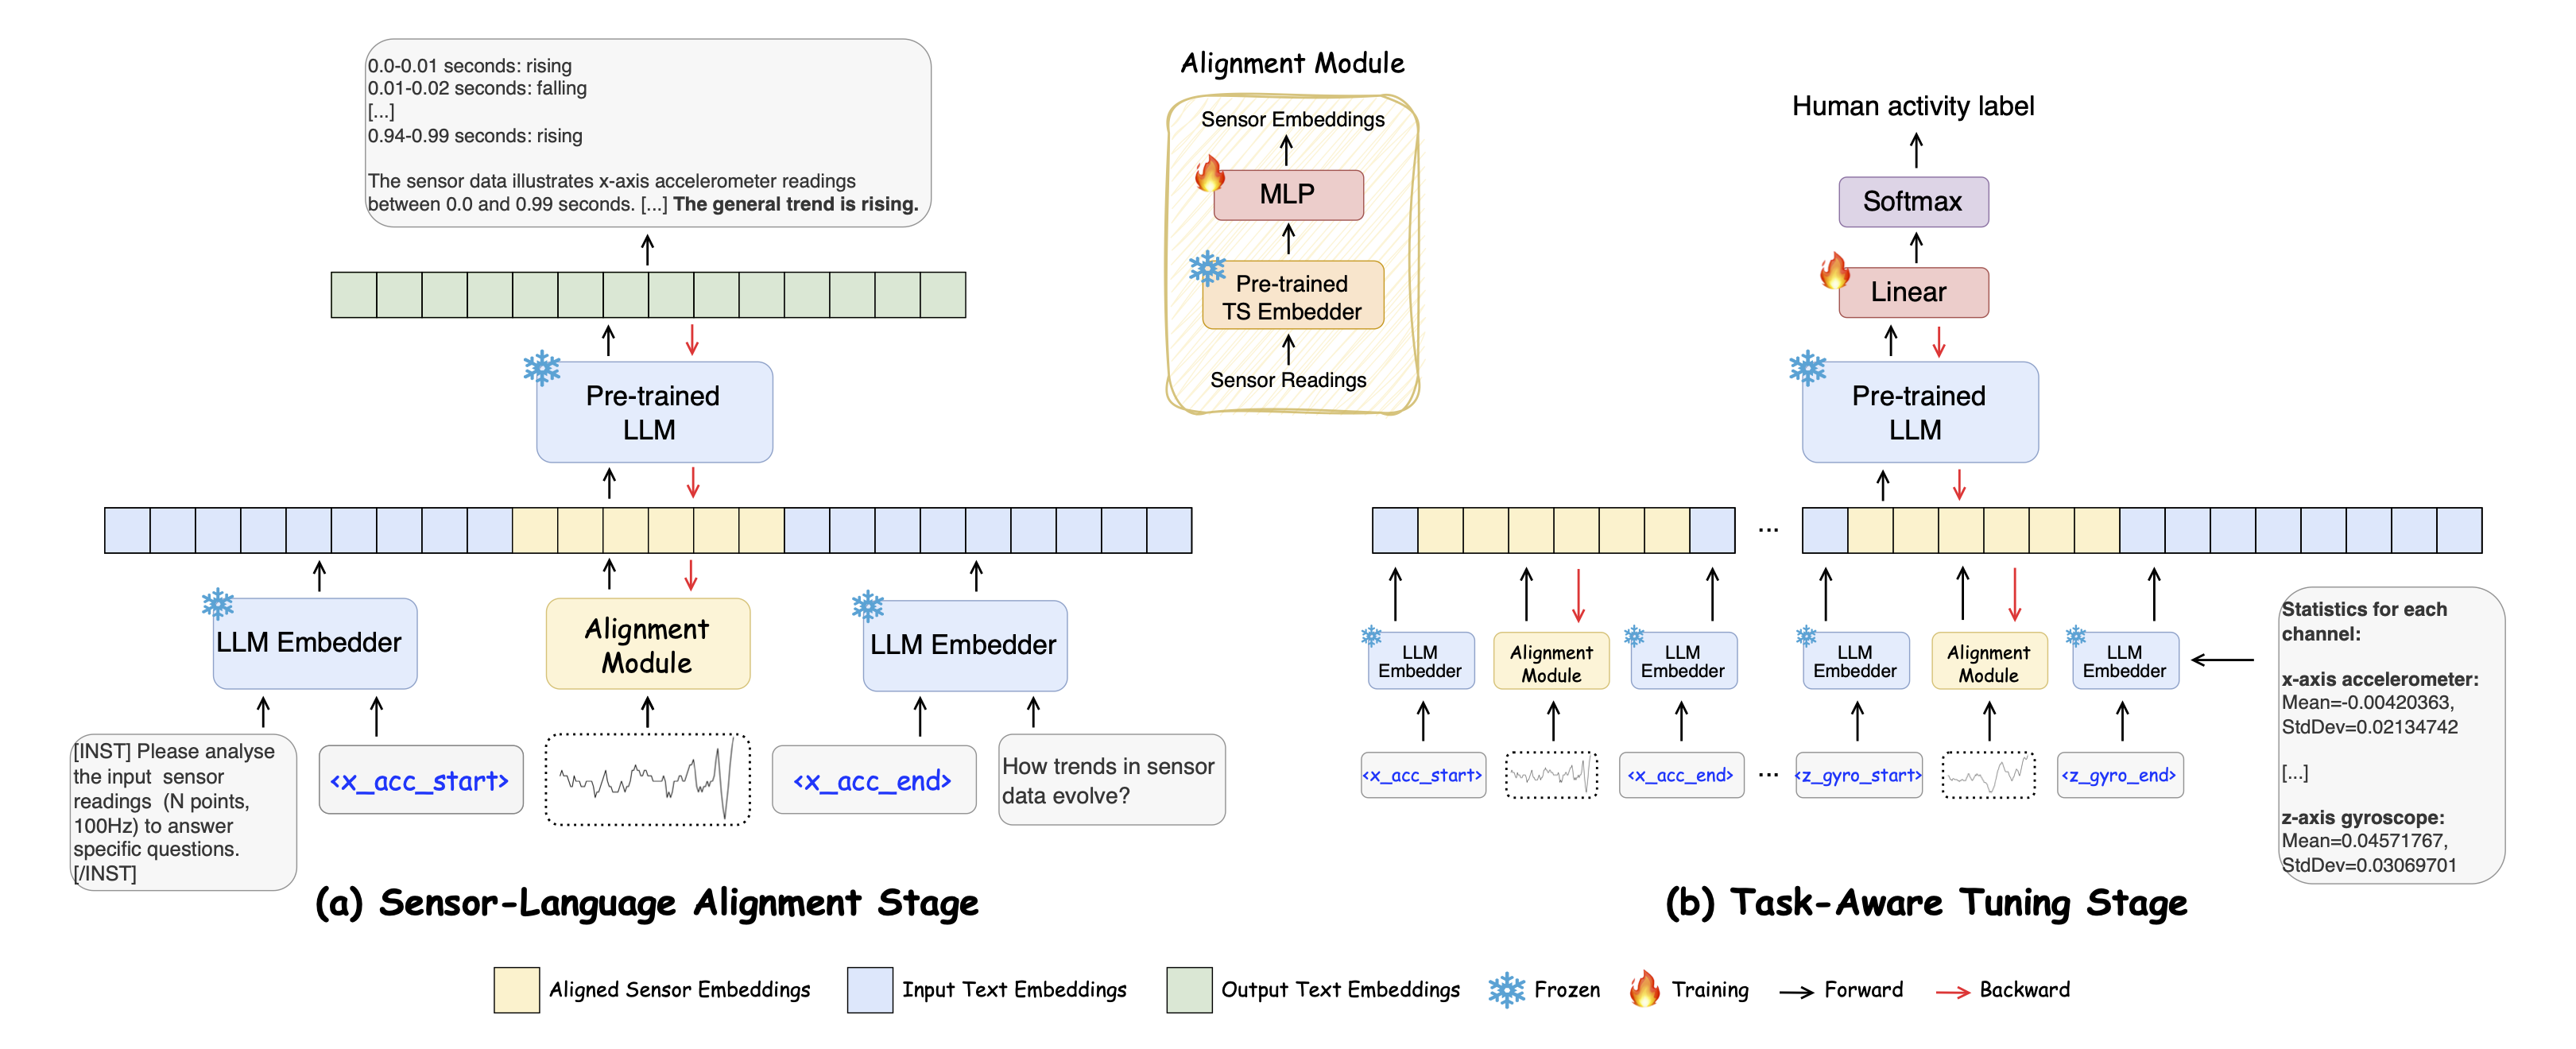

The model is trained on data that is standardized on this format :



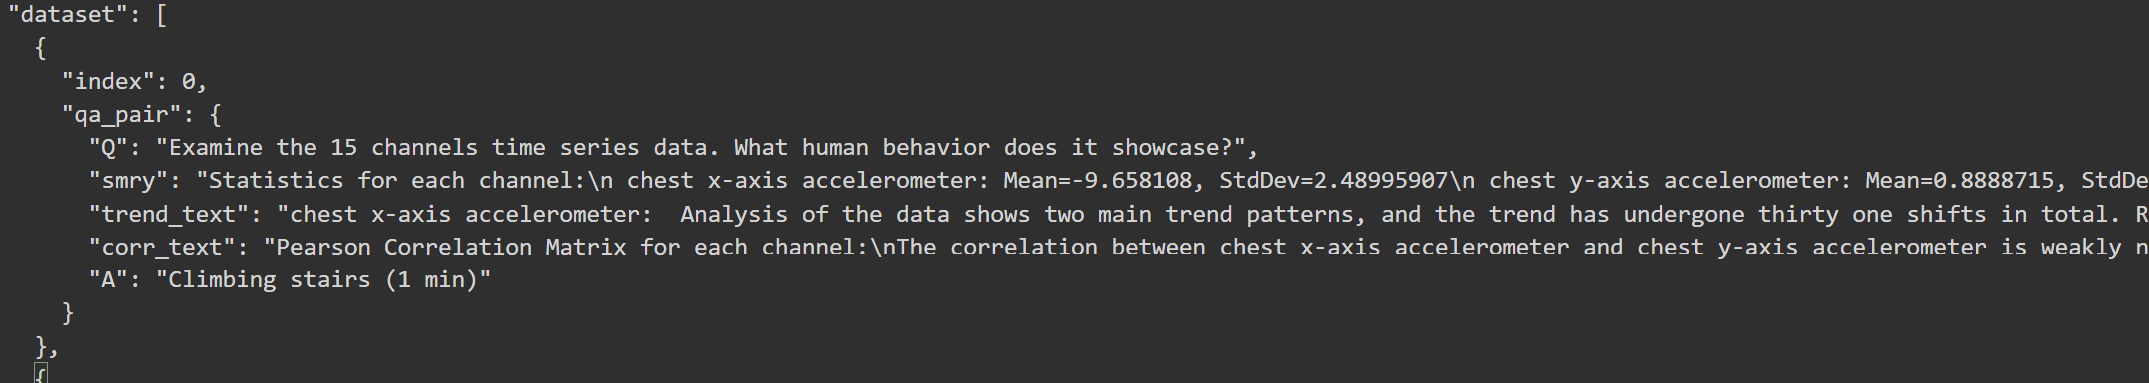




## 6. Datasets and Sensor Modalities
The SensorLLM implementation supports common HAR datasets such as:
- USC-HAD
- UCI-HAR
- MHealth
- Capture-24
- PAMAP2

These datasets typically include multimodal signals, for example:
- Accelerometer (ACC)
- Gyroscope (GYRO)
- Heart-related signals (e.g., PPG when available)
- Electrodermal Activity (EDA)
- Temperature (TEMP)
- Altitude (ALT)

## 7. Strengths and Limitations

### Strengths
- **Reduced annotation cost**: Stage 1 relies on automatically generated trend-based text rather than manual descriptions.
- **Improved interpretability**: language-based outputs allow explanations and SensorQA-style interactions.
- **Potential for better generalization**: learning shared linguistic concepts may help transfer across datasets.

### Limitations
- **Pipeline complexity**: two-stage training and multiple components increase implementation/reproducibility challenges.
- **Computational cost**: training/fine-tuning LLM-based models can require significant GPU resources.
- **Dependence on description quality**: the quality of automatically generated trend descriptions influences alignment quality.

## 8. Our experiments

Our project focused on using the MHealth dataset to test if Large Language Models could process sensor data for activity recognition. We successfully extracted 9,558 sequences from the raw data, but immediately hit a technical wall: the sequences were different lengths. We had to build a specific pipeline to normalize these recordings so they would fit into a Transformer architecture, which requires fixed-size inputs.

Our method followed a two-stage process. First, we used Numpy to create a "Sensor-Language Alignment." We analyzed signal trends and automatically generated simple text descriptions for them. This taught the model the basic "vocabulary" of the sensors—like identifying an increasing or stable signal—before trying to guess the actual activity. In the second stage, we designed the classification system to take all 15 sensor channels and map them to the 12 specific human activities in the dataset.

These data can be visualised in the Visualisations.ipynb notebook.

The main takeaway from this project was the massive hardware requirement of LLMs. We couldn't finish the final training because the model exceeded the available GPU VRAM. This taught us that deploying these models requires heavy optimization. Even though we didn't get a fully trained model, we successfully built the entire architecture that turns raw sensor numbers into tokens that a language model can understand.

## 9. Conclusion (Link to Our Experiments)
SensorLLM lies at the intersection of HAR and multimodal language learning. Beyond classification, it enables more interpretable sensor analytics through time-series ↔ language alignment.  
In our experiments (notebook), we will evaluate the model on a selected dataset (e.g., MHealth or UCI-HAR) and report metrics such as accuracy and macro F1-score, while documenting practical constraints (installation, compute, stability).